<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
X_train[:5]

array([list([1, 248, 409, 166, 265, 1537, 1662, 8, 24, 4, 1222, 2771, 7, 227, 236, 40, 85, 944, 10, 531, 176, 8, 4, 176, 1613, 24, 1662, 297, 5157, 6, 10, 103, 5, 231, 215, 8, 7, 2889, 6, 10, 1202, 69, 4, 1222, 329, 2771, 24, 944, 23, 944, 1662, 40, 2509, 1592, 907, 69, 4, 113, 997, 762, 2539, 7, 227, 236, 17, 12]),
       list([1, 4665, 1183, 413, 381, 7, 1134, 1664, 62, 729, 7, 4, 121, 273, 93, 109, 28, 2115, 72, 11, 428, 4, 387, 989, 558, 3956, 8, 7, 25, 1213, 427, 1969, 223, 4, 213, 5, 387, 580, 8, 1145, 413, 62, 410, 451, 18, 428, 7, 4, 121, 6, 3106, 19, 11, 428, 9, 1283, 317, 65, 413, 138, 59, 12, 11, 428, 6, 6118, 63, 11, 4, 3956, 8, 3640, 1183, 413, 202, 251, 18, 428, 6, 546, 19, 11, 428, 9, 317, 65, 413, 7, 4, 1721, 427, 409, 7145, 138, 19, 19, 11, 428, 6, 3843, 70, 11, 4, 135, 5, 137, 317, 1833, 542, 9, 7145, 413, 138, 72, 47, 11, 428, 6, 19, 5106, 19, 16, 8, 17, 12]),
       list([1, 56, 14065, 65, 9, 249, 149, 8, 4, 347, 5, 25, 65, 9, 249, 282, 333, 27, 258, 20, 6, 644, 59,

In [4]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [5]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
# TODO - yourcode!



8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [ ]:
# Seeing how many topics there are
print(y_test.max())
print(y_test.min())


In [14]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='sigmoid'))

0

In [22]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1)
          #validation_data=(X_test, y_test)

Train...
Train on 8982 samples
8982/8982 [==============================] - 173s 19ms/sample - loss: 2.0169 - accuracy: 0.5095


In [25]:
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

InvalidArgumentError:  indices[39,116] = 30979 is not in [0, 30979)
	 [[node sequential_2/embedding_2/embedding_lookup (defined at /Applications/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]] [Op:__inference_distributed_function_17661]

Function call stack:
distributed_function


In [21]:
print(X_test.shape, X_train.shape)
print(y_test.shape, y_train.shape)

(2246, 200) (8982, 200)
(2246,) (8982,)


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Pad_sequences makes the data line up so that X_train and X_test have spots for all of the words used in the whole dataset even if they do not appear in that subset.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

LSTM does a better job remembering older data. Traditional Recurrent Neural Networks suffer from the vanishing gradient problem.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

LSTMs are particularly useful for modelling text and speech data because they can store longer-term dependencies. A traiditional RNN might be well suited for something like autocorrect if it is only looking at the previous word and not taking into account the context of the whole text.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [26]:
!pip install google_images_download

     |████████████████████████████████| 911kB 2.2MB/s 
  Stored in directory: /Users/scotthuston/Library/Caches/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [27]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 4, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 1.PKLS4116_inline.png
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 3.PKLS4116.png
Image URL: https://i.pinimg.com/originals/12/ae/e2/12aee2aa186a7b69a66563f138bba822.jpg
Completed Image ====> 4.12aee2aa186a7b69a66563f138bba822.jpg

Errors: 0



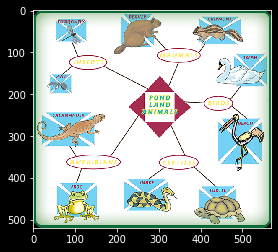

In [45]:
from skimage import io
import matplotlib.pyplot as plt

image = io.imread(absolute_image_paths[0]['animal pond'][0])
plt.imshow(image)

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [58]:
# Testing stuff here

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import numpy as np

path = absolute_image_paths[0]['animal pond'][0]

processed_img = image.load_img(path, target_size=(224, 224))

numpy_image = img_to_array(processed_img)

input_image = np.expand_dims(numpy_image, axis=0)

processed_image_resnet50 = resnet50.preprocess_input(input_image.copy())

model = ResNet50(weights='imagenet')

predictions_resnet50 = model.predict(processed_image_resnet50)

label_resnet50 = decode_predictions(predictions_resnet50)
print ('label = ', label_resnet50)


# if ('slot' or 'tree frog' or 'tailed frog') in label_resnet50:
#   print('frog')

label =  [[('n04243546', 'slot', 0.931612), ('n04476259', 'tray', 0.030293236), ('n03908618', 'pencil_box', 0.011190501), ('n03291819', 'envelope', 0.0034053412), ('n03485794', 'handkerchief', 0.0024016898)]]


In [63]:
for label in label_resnet50[0]:
  if label[1] in ['slot', 'tree frog', 'tailed frog']:
    print(1)
  else:
    print(0)

1
0
0
0
0


In [61]:
label_resnet50[0][0][1]

'slot'

In [64]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.applications.resnet50 import ResNet50
    from tensorflow.keras.applications import resnet50
    from tensorflow.keras.preprocessing.image import img_to_array
    from tensorflow.keras.applications.imagenet_utils import decode_predictions
    import numpy as np

    frogs = 0

    numpy_image = img_to_array(img)

    input_image = np.expand_dims(numpy_image, axis=0)

    processed_image_resnet50 = resnet50.preprocess_input(input_image.copy())

    model = ResNet50(weights='imagenet')

    predictions_resnet50 = model.predict(processed_image_resnet50)

    label_resnet50 = decode_predictions(predictions_resnet50)
    for label in label_resnet50[0]:
      if label[1] in ['bullfrog', 'tree frog', 'tailed frog']:
        frogs = 1
        
    """ Scans image for Frogs
    
    Should return a integer with the number of frogs detected in an
    image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    # Your Code Here
    # TODO - your code!
            
    return frogs

In [68]:
# Printing predications for each image

for path in absolute_image_paths[0]['animal pond']:    
    processed = process_img_path(path)

    pred = img_contains_frog(processed)

    if pred == 0:
        print('No frog')
    else:
        print('Frog')

No frog
No frog
No frog
No frog


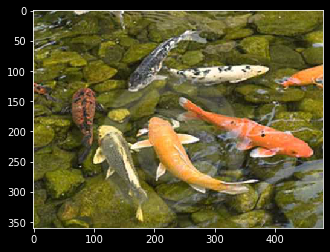

In [72]:
# displaying images

plt.imshow(io.imread(absolute_image_paths[0]['animal pond'][0]))

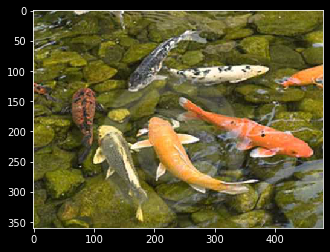

In [73]:
plt.imshow(io.imread(absolute_image_paths[0]['animal pond'][1]))

#### Displaying Predictions
The next two cells are just to display some of your predictions. You will not be graded on their output.

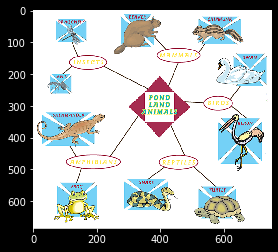

In [74]:
plt.imshow(io.imread(absolute_image_paths[0]['animal pond'][2]))

In [ ]:
import matplotlib.pyplot as plt

def display_predictions(urls):
    image_data = []
    frogs = []
    for url in urls:
        x = process_img_path(url)
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        image_data.append(x)
        frogs.append(img_contains_frog(x))
    
    return image_data,frogs

In [ ]:
f, axarr = plt.subplots(2,2)

imgs, frogs = display_predictions(absolute_image_paths[0]['animal pond'])

for x,y in [(0,0),(0,1), (1,0), (1,1)]:  
    axarr[x,y].imshow(np.squeeze(imgs[x], axis=0) / 255)
    axarr[x,y].set_title(f"Frog: {frogs[x]}")
    axarr[x,y].axis('off')

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__
Autoencoders are useful for dimensionality reduction. They compress data to be uncompressed later.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

Predictive modeling - regression, trees, forests, etc.

- What area of Data Science would you most like to learn more about, and why?

Neural networks, because that's where I think the biggest breakthroughs will come from

- Where do you think Data Science will be in 5 years?

Incorporating visual processing into augmented reality will probably be a rapidly growing use case.

- What are the threats posed by AI to our society?

The biggest threat is unalignment. We need to figure out how to get AIs to reliably do what we would want even in situations we haven't encountered.

- How do you think we can counteract those threats?

What Neuralink is trying to do with integrating AI with our brains is one very interesting approach

- Do you think achieving General Artifical Intelligence is ever possible?

Yes. Our brains are physical systems. I don't see any reason in principle that we couldn't at least copy their architecture and function given enough compute and knowledge about our brains.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [ ]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")